## GeoTIFF using Rasterio

### Importing the library

In [1]:
import rasterio

### Opening a `.tif` file

In [2]:
dataset = rasterio.open('data/lucknow_airshed/images/8982881_3146145.tif')

### Dataset Attributes

In [3]:
dataset.name

'data/lucknow_airshed/images/8982881_3146145.tif'

In [4]:
dataset.mode

'r'

In [5]:
dataset.closed

False

#### Bands
Dataset objects have bands. A dataset band is an array of values representing the partial distribution of a single variable in 2-dimensional (2D) space. All band arrays of a dataset have the same number of rows and columns.

In [6]:
dataset.count

3

In [7]:
dataset.width

640

In [8]:
dataset.height

640

To get a mapping of band indexes to variable data types, apply a dictionary comprehension to the zip() product of a dataset’s DatasetReader.indexes and DatasetReader.dtypes attributes.

In [9]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'uint8', 2: 'uint8', 3: 'uint8'}

### Dataset georefrencing
A GIS raster dataset is different from an ordinary image; its elements (or “pixels”) are mapped to regions on the earth’s surface. Every pixels of a dataset is contained within a spatial bounding box.

In [11]:
dataset.bounds

BoundingBox(left=8981350.82226706, bottom=3144619.3432216584, right=8984408.303398043, top=3147676.8243526407)

Our example covers the world from 8981350.82226706 meters (in this case) to 8981350.82226706 meters, left to right, and 8981350.82226706 meters to 8981350.82226706 meters bottom to top. It covers a region 3.057481131 km kilometers wide by 3.057481131 km kilometers high.

In [12]:
dataset.transform

Affine(4.777314267160607, 0.0, 8981350.82226706,
       0.0, -4.777314267159879, 3147676.8243526407)

A dataset’s transform is an affine transformation matrix that maps pixel locations in (col, row) coordinates to (x, y) spatial positions. The product of this matrix and (0, 0), the column and row coordinates of the upper left corner of the dataset, is the spatial position of the upper left corner.

In [13]:
dataset.transform * (0, 0)

(8981350.82226706, 3147676.8243526407)

The position of the lower right corner is obtained similarly.

In [14]:
dataset.transform * (dataset.width, dataset.height)

(8984408.303398043, 3144619.3432216584)

These coordinate values are relative to the origin of the dataset’s coordinate reference system (CRS).

In [15]:
dataset.crs

CRS.from_epsg(3857)

EPSG:32612 identifies a particular coordinate reference system: UTM zone 12N. This system is used for mapping areas in the Northern Hemisphere between 108 and 114 degrees west.

### Reading raster data

In [16]:
dataset.indexes

(1, 2, 3)

In [18]:
band1, band2, band3 = dataset.read(1), dataset.read(2), dataset.read(3)

In [19]:
band1

array([[51, 49, 64, ..., 39, 41, 39],
       [44, 43, 55, ..., 42, 43, 41],
       [44, 47, 49, ..., 44, 46, 43],
       ...,
       [31, 64, 65, ..., 33, 30, 39],
       [49, 57, 46, ..., 29, 35, 38],
       [44, 37, 40, ..., 26, 33, 29]], dtype=uint8)

### Spatial indexing
To get the value for the pixel 1 kilometers east and 0.5 kilometers south of the dataset’s upper left corner, do the following.

In [22]:
x, y = (dataset.bounds.left + 1000, dataset.bounds.top - 500)
row, col = dataset.index(x, y)
row, col

(104, 209)

In [23]:
band1[row, col]

33

The spatial coordinates of a pixel, say, the coordinates of the center of the image can be computed like this.

In [24]:
dataset.xy(dataset.height // 2, dataset.width // 2)

(8982881.951489685, 3146145.6951300157)

this can also be done by multiplying the transform matrix by the center of the image.

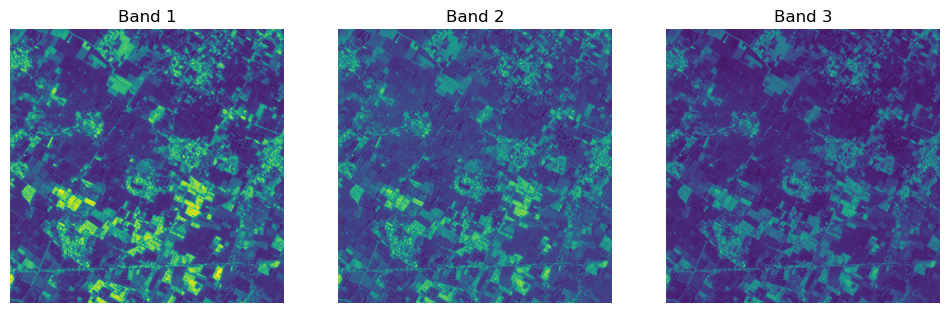

In [32]:
# plot dataset.read() using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, band in enumerate([band1, band2, band3]):
    ax[i].imshow(band)
    ax[i].set_title(f'Band {i + 1}')
    ax[i].axis('off')
plt.show()

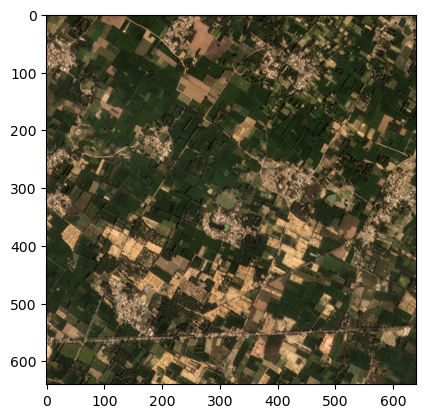

In [35]:
plt.imshow(dataset.read().transpose((1, 2, 0)))

In [36]:
dataset_2 = rasterio.open('data/lucknow_airshed/images/8982881_3077352.tif')

In [37]:
dataset_2.count

3